In [2]:
import pandas as pd
import json

In [8]:
data = data['data']

In [16]:
df = pd.DataFrame(data['locations'])

In [21]:
import matplotlib.pyplot as plt

In [39]:
df_1 = df[(df['coordinateY'] < 30.4) & (df['coordinateX'] > 59.85) & (df['coordinateX'] < 60) & (df['coordinateY'] > 30.2)] 

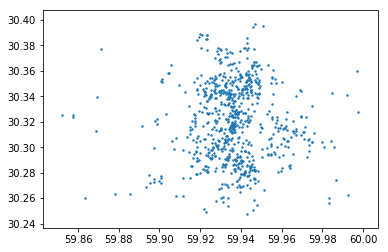

In [40]:
plt.scatter(df_1.coordinateX, df_1.coordinateY,s=2)

In [4]:
cd Downloads/

/Users/go.gle/Downloads


In [5]:
with open('persons.txt') as json_file:
    data = json.load(json_file)

In [6]:
data = data['data']

In [7]:
df = pd.DataFrame(data['persons'])

In [8]:
cols = ['description', 'firstName', 'lastName',
       'profession', 'pseudonym']

In [9]:
for col in cols:
    df[col] = df[col].apply(lambda x: x['ru'])

In [18]:
a = []

In [10]:
df['full_name'] = df['lastName'] + ' ' + df['firstName']

In [11]:
name_set = df['full_name'].unique()

In [12]:
df.shape

(965, 10)

In [13]:
with open('locations.txt') as json_file:
    loc = json.load(json_file)

In [14]:
loc = loc['data']
loc = pd.DataFrame(loc['locations'])

In [15]:
loc['description'] = loc['description'].apply(lambda x: x['ru'])

In [16]:
X = loc[['coordinateX', 'coordinateY','description','wikiLink']]

In [90]:
import pymorphy2

In [132]:
def lem_descr(descr):
    if not descr:
        return ''
    descr = descr.split(' ')
    out = []
    for wrd in descr:
        out.append(morph.parse(wrd)[0].normal_form)
    return ' '.join(out)

In [134]:
loc['morph_lec'] = loc['description'].apply(lambda x: lem_descr(x))

In [140]:
X['morp'] = loc['morph_lec']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [310]:
from tqdm import tqdm_notebook

In [ ]:
ind = X.shape[0]
col = len(name_set)
zero_data = np.zeros(shape=(ind,col))
temp = pd.DataFrame(zero_data)

,coordinateX,coordinateY,description,wikiLink,morp
0,59.945277,30.292889,В этом доме проживали: Чайковский Петр Ильич (...,http://www.citywalls.ru/house374.html,в это дом проживали: чайковский пётр илья (184...
1,59.954917,30.293707,"Когда в начале 1910-х годов участок под № 18, ...",http://www.citywalls.ru/house999.html,"когда в начало 1910-ха год участок под № 18, к..."
2,59.927491,30.330852,одно из наиболее престижных высших учебных зав...,https://ru.wikipedia.org/wiki/%D0%98%D0%BC%D0%...,один из наиболее престижный высокий учебный за...
3,59.945617,30.341084,"Л. М. Конисская в книге ""Чайковский в Петербур...",http://www.citywalls.ru/house7260.html,"л. м. конисский в книга ""чайковский в петербур..."
4,59.945319,30.287032,С 1840-х гг. участок с домами Средний пр. 8 / ...,http://www.citywalls.ru/house7445.html,с 1840-ха гг. участок с дом средний пр. 8 / ту...
5,59.941371,30.278067,К середине XIX века двор был застроен двухэтаж...,http://www.citywalls.ru/house514.html,к середина xix век двор быть застроить двухэта...
6,59.946306,30.282136,Узкий участок № 45 начал застраиваться в серед...,http://www.citywalls.ru/house28042.html,узкий участок № 45 начать застраиваться в сере...
7,59.917506,30.318886,Санкт-Петербургский практический технологическ...,https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D0%...,санкт-петербургский практический технологическ...
8,59.935800,30.337293,Участок на углу Малой Садовой (дом 1) и Италья...,https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%...,участок на угол малый садовый (дом 1) и италья...
9,59.938859,30.332621,В основном идея постройки новой резиденции для...,https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D1%...,в основное идея постройка новый резиденция для...


In [313]:
for i_ind in tqdm_notebook(range(X.shape[0])):
    for j_name in range(len(name_set)):
        if type(name_set[j_name]) != str: continue    
        name, surname = name_set[j_name].split(' ')[:2]
        temp.loc[i_ind, j_name] = min(X.loc[i_ind, 'morp'].count(name.lower()), X.loc[i_ind, 'morp'].count(surname.lower()))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


HBox(children=(IntProgress(value=0, max=879), HTML(value='')))

In [301]:
import numpy as np

In [328]:
x_joined = X.join(temp)

In [419]:
x_joined.to_csv('dataset.csv',index=False)

In [17]:
x_joined = pd.read_csv('dataset.csv')

In [18]:
x_joined

,coordinateX,coordinateY,0,1,2,3,4,5,6,7,...,909,910,911,912,913,914,915,916,917,918
0,59.945277,30.292889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,59.954917,30.293707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59.927491,30.330852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,59.945617,30.341084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59.945319,30.287032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,59.941371,30.278067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,59.946306,30.282136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,59.917506,30.318886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,59.935800,30.337293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,59.938859,30.332621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [331]:
from sklearn.cluster import KMeans

In [335]:
col_to_drop = ['description', 'wikiLink', 'morp']

In [346]:
x_joined = x_joined.drop(col_to_drop, axis=1).dropna()

In [24]:
x_dropped = x_joined[(x_joined['coordinateY'] < 30.4) & (x_joined['coordinateX'] > 59.85) & (x_joined['coordinateX'] < 60) & (x_joined['coordinateY'] > 30.2)]

In [353]:
from matplotlib import pyplot as plt

In [373]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
x_scalled = scl.fit_transform(x_dropped)

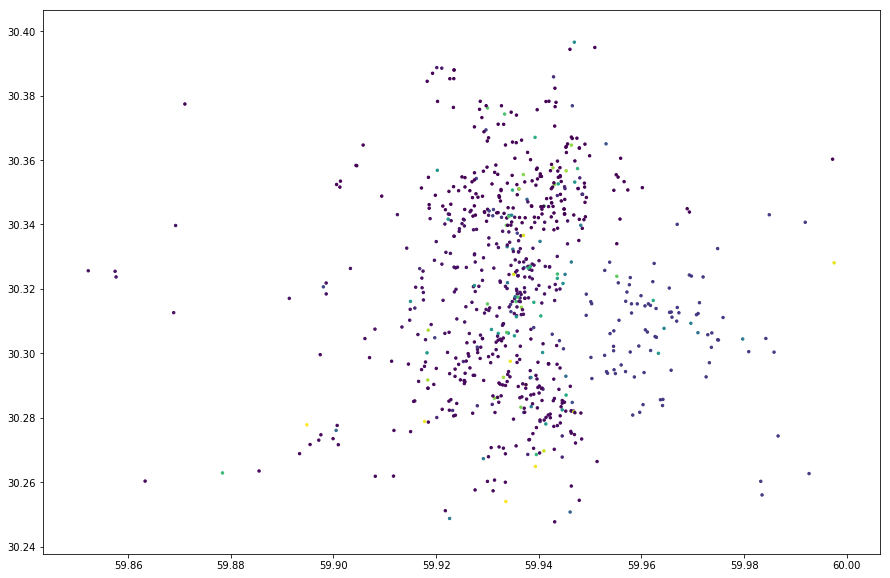

In [378]:
kmean = KMeans(50).fit(x_scalled)
plt.figure(figsize=(15,10))
plt.scatter(x_dropped['coordinateX'], x_dropped['coordinateY'], c=kmean.labels_, s=6)

In [25]:
x_without_zeros = x_dropped[x_dropped.drop(['coordinateX', 'coordinateY'], axis=1).sum(axis=1) > 0]

In [393]:
scl = MinMaxScaler()
x = scl.fit_transform(x_without_zeros)

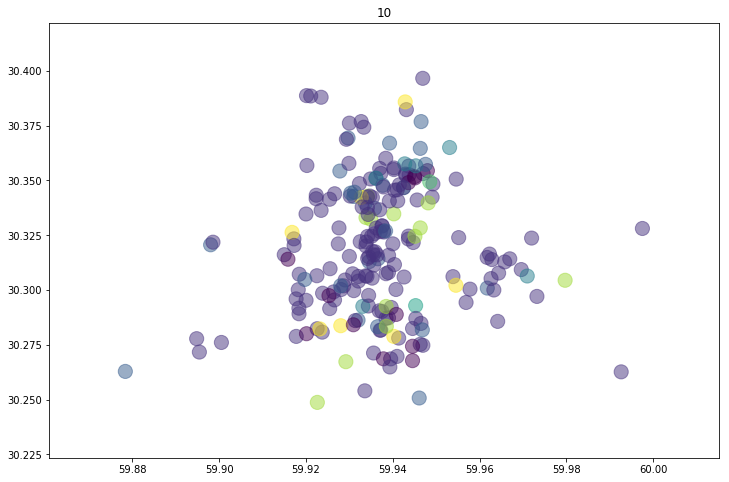

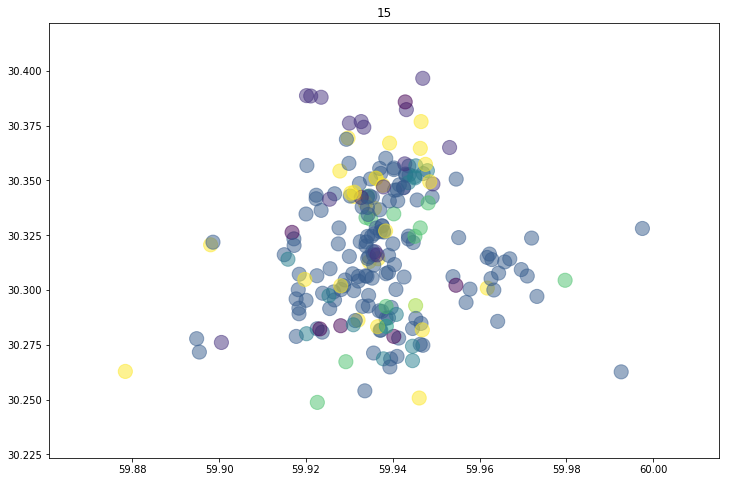

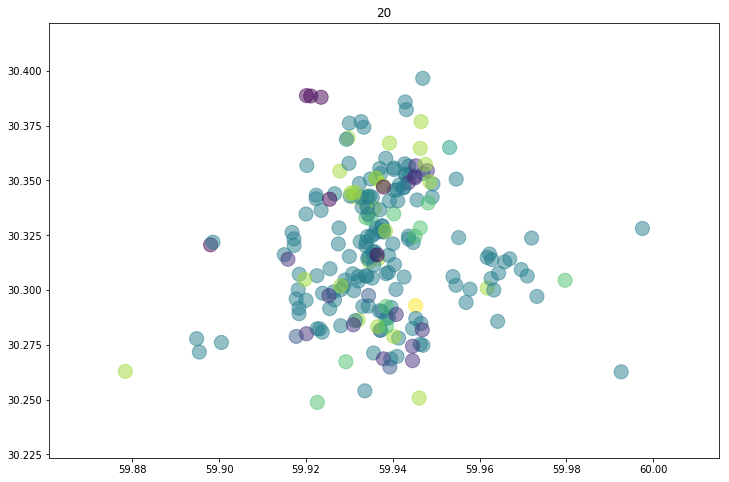

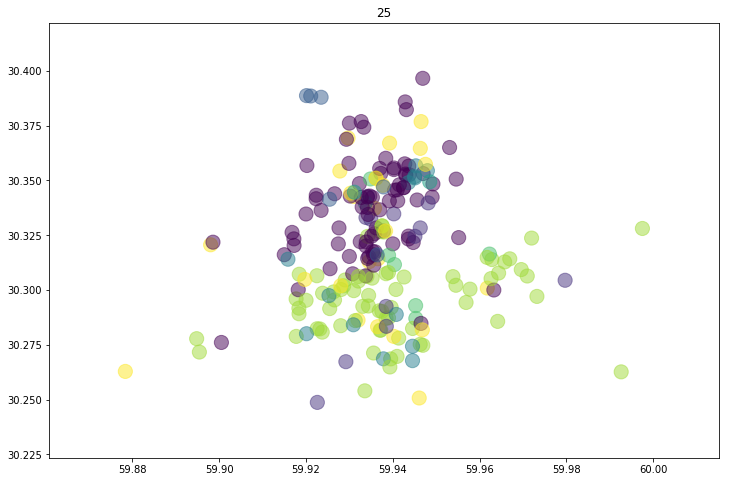

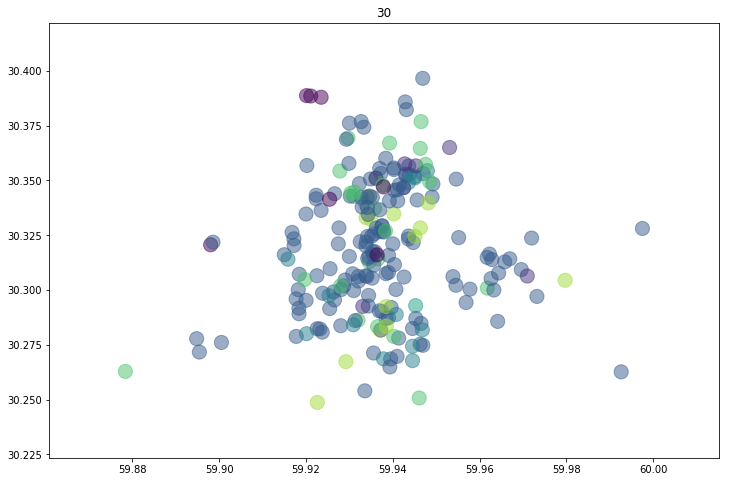

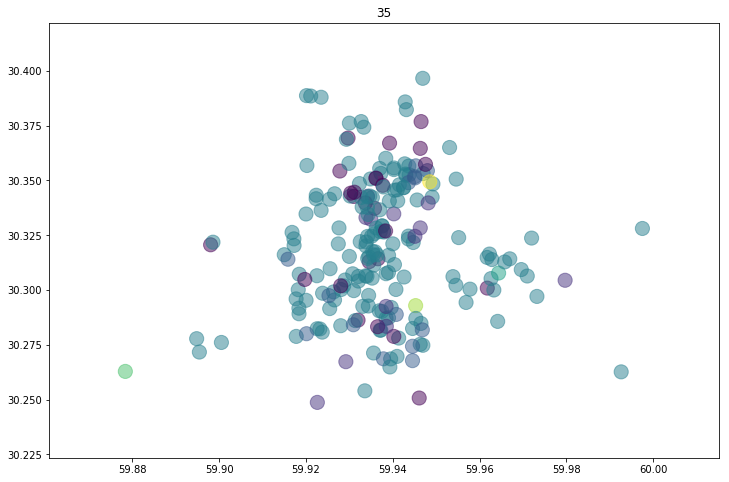

In [399]:
for i in range(10,40,5):
    kmean = KMeans().fit(x)
    plt.figure(figsize=(12,8))
    plt.scatter(x_without_zeros['coordinateX'], x_without_zeros['coordinateY'], c=kmean.labels_, s=200, alpha=0.5)
    plt.title(i)
    plt.show()

In [19]:
prof = pd.read_csv('data_persons_professions_v3.csv',index_col=False)

In [20]:
len(prof['full_name'].unique())

919

In [21]:
prof[prof['full_name'].isna()]

,Unnamed: 0,Unnamed: 0.1,id,firstName,lastName,professionClean,full_name
161,162,162,5d83443d0cb433003f223b8a,NaN,Екатерина II,общественные деятели,NaN


In [22]:
name_prof_set = [0] * len(prof['full_name'].unique())
for i in range(len(name_set)):
    for j in range(len(prof)):
        if name_set[i] == prof.loc[j,'full_name']:
            name_prof_set[i] = (name_set[i], prof.loc[j,'professionClean'])
            break
        name_prof_set[i] = ('', 'общественные деятели')

In [23]:
a = [name_prof_set[i][1] for i in range(len(name_prof_set))]

In [28]:
import numpy as np

In [29]:
ind = x_without_zeros.shape[0]
col = len(prof['professionClean'].unique())
zero_data = np.zeros(shape=(ind,col))
temp = pd.DataFrame(zero_data, columns = prof['professionClean'].unique())

In [30]:
matr = x_without_zeros.drop(['coordinateX', 'coordinateY'],axis=1).values
for i in range(matr.shape[0]):
    for j in range(matr.shape[1]):
        if type(a[j]) == str:
            temp.loc[i,a[j]] += matr[i][j]

,танцы,певцы,наука,композиторы,nan,музыка,актеры,литература,художники,архитектура,общественные деятели,религия,военные деятели,предпринимательство,благотворительность,спорт,плотничный
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
x_without_zeros.reset_index(drop=True, inplace=True)
x_without_zeros['class'] = temp.idxmax(axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
x_without_zeros.join(temp).to_csv('locations_full.csv')

In [553]:
x

(216, 922)

In [550]:
temp.idxmax(axis=1)

0        художники
1      архитектура
2        художники
3        художники
4            танцы
5      архитектура
6            танцы
7            танцы
8            танцы
9        художники
10       художники
11           танцы
12           танцы
13           танцы
14           певцы
15       художники
16       художники
17          музыка
18      литература
19          музыка
20          музыка
21       художники
22           танцы
23     архитектура
24           танцы
25     архитектура
26           танцы
27     архитектура
28           танцы
29     архитектура
          ...     
186          певцы
187          певцы
188          танцы
189          танцы
190    архитектура
191    архитектура
192     литература
193          танцы
194          танцы
195          танцы
196    архитектура
197          танцы
198          танцы
199          танцы
200    композиторы
201    архитектура
202    архитектура
203      художники
204      художники
205          танцы
206    архитектура
207      худ

In [564]:
x_without_zeros.to_csv('location_classified_v2.csv',index=False)

In [44]:
x_without_zeros['target'] = x_without_zeros['class'].astype('category').cat.codes

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
import matplotlib.pyplot as plt

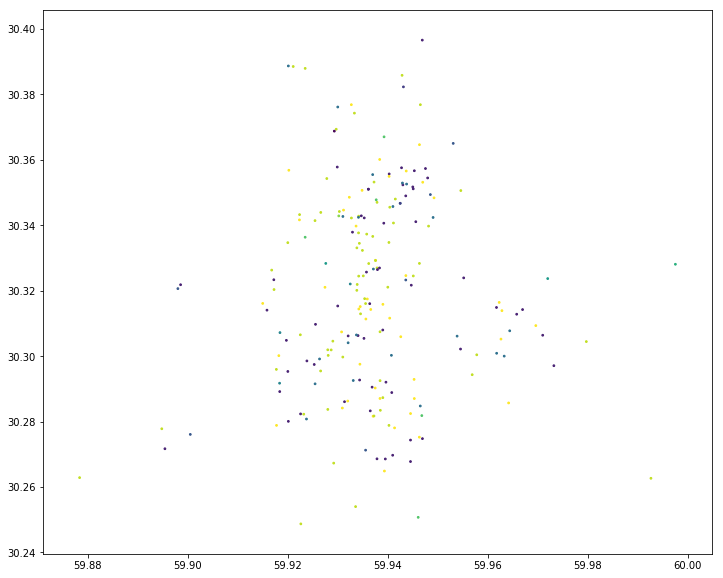

In [51]:
plt.figure(figsize=(12,10))
plt.scatter(x_without_zeros['coordinateX'], x_without_zeros['coordinateY'], c=x_without_zeros['target'],s=3)

In [58]:
prof[prof['professionClean'].isna()]

,Unnamed: 0,Unnamed: 0.1,id,firstName,lastName,professionClean,full_name
8,8,8,5d83443c0cb433003f223aed,Владимир,Альтшулер,NaN,Альтшулер Владимир
11,11,11,5d83443c0cb433003f223af0,Любовь,Андреева-Дельмас,NaN,Андреева-Дельмас Любовь
13,13,13,5d83443c0cb433003f223af2,Борис,Анисимов,NaN,Анисимов Борис
21,21,21,5d83443c0cb433003f223afa,Милий,Балакирев,NaN,Балакирев Милий
23,23,23,5d83443c0cb433003f223afc,Антон,Барцал,NaN,Барцал Антон
33,33,33,5d83443c0cb433003f223b06,Дмитрий,Бортнянский,NaN,Бортнянский Дмитрий
43,43,43,5d83443c0cb433003f223b10,Владимир,Васильев,NaN,Васильев Владимир
48,49,49,5d83443c0cb433003f223b16,Софья,Гладкая,NaN,Гладкая Софья
50,51,51,5d83443c0cb433003f223b18,Михаил,Глинка,NaN,Глинка Михаил
56,57,57,5d83443c0cb433003f223b1e,Александр,Даргомыжский,NaN,Даргомыжский Александр
